## Linear Regression and Train/Test Split challenges

Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.)

### Table of Contents

In [137]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [138]:
movie_data = pd.read_csv("2013_movies copy.csv")

In [139]:
movie_data.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [169]:
movie_data = movie_data.applymap(lambda x: np.nan if x == "NaN" else x)
md_no_na = movie_data[pd.isnull(movie_data["Budget"]) == False]

In [170]:
movie_data["Constant"] = np.ones(len(movie_data))

In [171]:
results = smf.ols(formula = "DomesticTotalGross ~ Constant", data = movie_data).fit()

In [172]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 25 Jul 2016   Prob (F-statistic):                nan
Time:                        14:03:18   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.000      4.16e+07   5.9e+07
Constant     5.03e+07   4.37e+06     11.510      0.000      4.16e+07   5.9e+07
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                     3.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

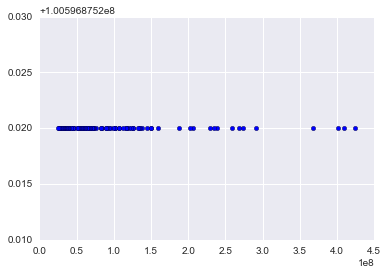

In [173]:
sns.plt.scatter(y = results.predict(), x = movie_data["DomesticTotalGross"])

The line is flat because the predicted domestic total gross for every movie is the same

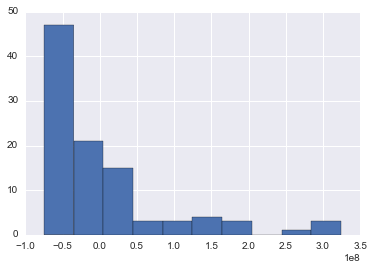

In [174]:
hist_plot = sns.plt.hist(results.resid)


Residuals are right-skewed

### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [161]:
results = smf.ols(formula = "DomesticTotalGross ~ Constant + Budget", data = movie_data).fit()

In [162]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           6.80e-08
Time:                        14:01:05   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    2.22e+07   6.33e+06      3.504      0.001      9.61e+06  3.48e+07
Constant     2.22e+07   6.33e+06      3.504      0.001      9.61e+06  3.48e+07
Budget         0.7846      0.133      5.901      0.000         0.520     1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     7.04e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


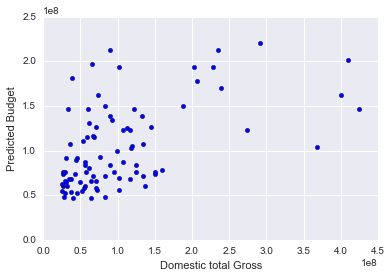

In [165]:
predictions = results.predict()
md_no_na["predictions"] = predictions
predicted_plot = sns.plt.scatter(y = "predictions", x = "DomesticTotalGross", data = md_no_na) 
predicted_plot.axes.set_ylabel('Predicted Budget')
predicted_plot.axes.set_xlabel('Domestic total Gross')

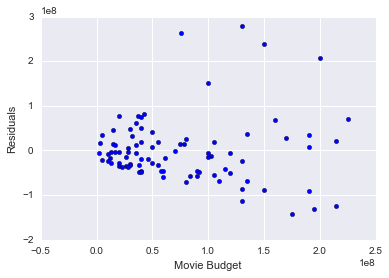

In [164]:
resid_plot = sns.plt.scatter(y = results.resid, x = md_no_na["Budget"])
resid_plot.axes.set_ylabel('Residuals')
resid_plot.axes.set_xlabel('Movie Budget')

We can see residuals have much higher variance as budget grows. That's an issue!

### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [67]:
results = smf.ols(formula = "DomesticTotalGross ~ Constant + Budget + Rating", data = md_no_na).fit()

In [70]:
md_no_na["Rating"].unique()

array(['PG-13', 'PG', 'R'], dtype=object)

In [68]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     11.61
Date:                Fri, 22 Jul 2016   Prob (F-statistic):           1.87e-06
Time:                        14:30:20   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3483.
Df Residuals:                      85   BIC:                             3493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        2.886e+07    1.2e+07      2.407      0.018      5.02e+06  5.27e+07
Rating[T.PG-13] -1.727e+07   2.26e+07     -0.766      0.446     -6.21e+07  2.76e+07
Rating[T.R]     -1.387e+07   2.47e+07     -0.561      0.576      -6.3e+07  3.53e+07
Constant         2.886e+07    1.2e+07      2.407      0.018      5.02e+06  5.27e+07
Budget              0.7816      0.152      5.157      0.000         0.480     1.083
==============================================================================
Omnibus:                       37.951   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.664
Skew:                           1.546   Prob(JB):                     5.58e-20
Kurtosis:                       6.788   Cond. No.                     6.83e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.73e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

I can interpret the p-values for the PG-13 Rating and R Rating as the probability that PG-13 movies and R movies, respectively, have different domestic total grosses than PG movies. The coefficient quantifies that difference

### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [116]:
md_no_na["LogBudget"] = np.log(md_no_na["Budget"])
results = smf.ols(formula = "DomesticTotalGross ~ Constant + Budget + Rating + Runtime", data = md_no_na).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Fri, 22 Jul 2016   Prob (F-statistic):           3.77e-06
Time:                        14:57:57   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        2.127e+06   2.58e+07      0.082      0.935     -4.92e+07  5.35e+07
Rating[T.PG-13] -2.779e+07   2.42e+07     -1.146      0.255      -7.6e+07  2.04e+07
Rating[T.R]     -2.547e+07   2.66e+07     -0.958      0.341     -7.83e+07  2.74e+07
Constant         2.127e+06   2.58e+07      0.082      0.935     -4.92e+07  5.35e+07
Budget              0.7036      0.165      4.255      0.000         0.375     1.032
Runtime          6.083e+05   5.21e+05      1.168      0.246     -4.27e+05  1.64e+06
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     5.18e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [146]:
y, X = dmatrices("np.log(DomesticTotalGross) ~ np.log(Budget) + Rating + Runtime", data = movie_data, return_type='dataframe')

In [147]:
from sklearn import cross_validation as cv
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(X,y,test_size=0.333,random_state=1234)
# model will be our model from the training set
model = LinearRegression().fit(x_train, y_train)

In [148]:
# we compare our predicted ys to the actual ys. So this is our mean_squared error for training set
print metrics.mean_squared_error(y_train, model.predict(x_train))
# comparing our predicted y's for the test to our actual test ys, this is test error
print metrics.mean_squared_error(y_test, model.predict(x_test))

0.392373294794
0.308745058605


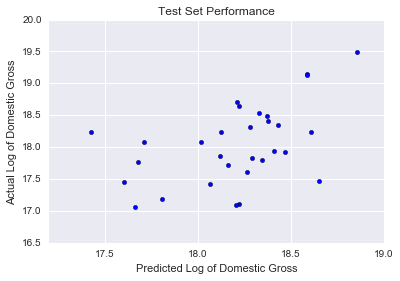

In [158]:
test_plot = sns.plt.scatter(x = model.predict(x_test), y = y_test)
test_plot.axes.set_ylabel('Actual Log of Domestic Gross')
test_plot.axes.set_xlabel('Predicted Log of Domestic Gross')
test_plot.axes.set_title("Test Set Performance")